# Course 1: Supply Chain Planning

## Module 1: Activity

Compute the **simple moving average**, **weighted moving average**, and **exponential smoothing** forecasts for the data in the Excel file `C1M1-Forecast Activity`.

In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
file_path = r"D:\2-Datasets from Various Resources\Supply Chains Domain Knowledge\Leverage DS Spec\Course1\C1M1-Forecast Activity.xlsx"
df_m_avg = pd.read_excel(file_path, sheet_name='Moving Avg FCST')
df_w_avg = pd.read_excel(file_path, sheet_name='Weighted Moving Avg')
df_exp = pd.read_excel(file_path, sheet_name='Exponential Smoothing')

## Step 1: Theoretical Overview of Forecasting Methods

In this exercise, we will apply three popular time series forecasting techniques on historical demand data to help with supply chain planning. Below is a brief theoretical overview of each method:

### 🔵 Simple Moving Average (SMA)

**Definition**:  
The Simple Moving Average smooths out short-term fluctuations by calculating the average of demand over a fixed number of past periods.

**Formula**:  
$$
\text{SMA}_t = \frac{1}{n} \sum_{i=0}^{n-1} D_{t-i}
$$

- $D_t$: Demand at time *t*  
- $n$: Number of periods

**Use Case**:  
Best used when demand is stable and doesn't exhibit strong trends or seasonality.

---

### 🟠 Weighted Moving Average (WMA)

**Definition**:  
The Weighted Moving Average assigns more importance (weight) to recent demand values when calculating the average.

**Formula**:  
$$
\text{WMA}_t = \sum_{i=0}^{n-1} w_i \cdot D_{t-i}
$$

- $w_i$: Weight applied to the demand at time *t-i*  
- Weights must sum to 1.

**Use Case**:  
Useful when recent data is more relevant to future predictions than older data.

---

### 🟣 Exponential Smoothing (ES)

**Definition**:  
Exponential Smoothing forecasts are a weighted average of past demand values, where the weights decrease exponentially over time.

**Formula**:  
$$
\hat{F}_{t+1} = \alpha D_t + (1 - \alpha) \hat{F}_t
$$

- $\hat{F}_{t+1}$: Forecast for next period  
- $D_t$: Actual demand at current period  
- $\alpha$: Smoothing factor (between 0 and 1)

**Use Case**:  
Ideal for noisy data without clear trends or seasonal patterns.

---

In the following steps, we will compute all three forecasts using Python instead of Excel, which allows for more flexible, scalable, and automatable workflows.


### Moving Average

In [4]:
df_m_avg.head()

,Month,Demand,3-month moving avereage,6-month moving average
0,1,650,NaN,NaN
1,2,678,NaN,NaN
2,3,720,NaN,NaN
3,4,785,NaN,NaN
4,5,859,NaN,NaN


In [5]:
# Rename the column with the correct spelling
df_m_avg.rename(columns={"3-month moving avereage": "3-month moving average"}, inplace=True)
df_m_avg.columns

Index(['Month', 'Demand', '3-month moving average', '6-month moving average'], dtype='object')

In [6]:
# Compute 3-month and 6-month moving averages
df_m_avg['3-month moving average'] = df_m_avg['Demand'].rolling(window=3).mean() 
df_m_avg['6-month moving average'] = df_m_avg['Demand'].rolling(window=6).mean()
df_m_avg.head(10)


,Month,Demand,3-month moving average,6-month moving average
0,1,650,NaN,NaN
1,2,678,NaN,NaN
2,3,720,682.666667,NaN
3,4,785,727.666667,NaN
4,5,859,788.000000,NaN
5,6,920,854.666667,768.666667
6,7,850,876.333333,802.000000
7,8,758,842.666667,815.333333
8,9,892,833.333333,844.000000
9,10,920,856.666667,866.500000


### Weighted Moving Average

In [7]:
df_w_avg.head()

,Month,Demand,Weight,Forecast
0,1,650.0,NaN,NaN
1,2,678.0,NaN,NaN
2,3,720.0,NaN,NaN
3,4,785.0,NaN,NaN
4,5,859.0,NaN,NaN


In [8]:
# Let's assume a 3-month weighted average with these weights
weights = np.array([0.5, 0.3, 0.2])

def weighted_moving_average(values, weights):
    return np.dot(values, weights)

# Create the forecast column
df_w_avg['Forecast'] = df_w_avg['Demand'].rolling(window=3).apply(
    lambda x: weighted_moving_average(x, weights), raw=True
)
df_w_avg.head(10)

,Month,Demand,Weight,Forecast
0,1,650.0,NaN,NaN
1,2,678.0,NaN,NaN
2,3,720.0,NaN,672.4
3,4,785.0,NaN,712.0
4,5,859.0,NaN,767.3
5,6,920.0,NaN,834.2
6,7,850.0,NaN,875.5
7,8,758.0,NaN,866.6
8,9,892.0,NaN,830.8
9,10,920.0,NaN,830.6


### Step 2 – Weighted Moving Average (WMA)

#### 🧠 Concept

The **Weighted Moving Average (WMA)** is a time series forecasting method that assigns different weights to recent observations, usually giving **more importance to more recent data points**.

The forecast is calculated as:

$$
\text{Forecast}_t = w_1 \cdot x_{t-2} + w_2 \cdot x_{t-1} + w_3 \cdot x_t
$$

Where:
- $x_{t-2}, x_{t-1}, x_t$ are the demand values from the previous 3 months,
- $w_1, w_2, w_3$ are the corresponding weights, and
- The weights should sum to **1.0**.

In this exercise, we are using the following weights:

```python
weights = np.array([0.2, 0.3, 0.5])  # From oldest to newest


In [11]:
# Final dataframe output

df_w_avg.drop(columns=['Weight'], inplace=True)
df_w_avg.fillna('Unapplicable', inplace=True)
df_w_avg.head(7)

C:\Users\lelo9\AppData\Local\Temp\ipykernel_22924\3248007574.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unapplicable' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_w_avg.fillna('Unapplicable', inplace=True)


,Month,Demand,Forecast
0,1,650.0,Unapplicable
1,2,678.0,Unapplicable
2,3,720.0,672.4
3,4,785.0,712.0
4,5,859.0,767.3
5,6,920.0,834.2
6,7,850.0,875.5


### Exponential Smoothing  

In [9]:
df_exp.head()

,Period,Demand,Forecast alpha = 0.1,Forecast alpha = 0.5
0,1,71,NaN,NaN
1,2,70,NaN,NaN
2,3,69,NaN,NaN
3,4,68,NaN,NaN
4,5,64,NaN,NaN


In [12]:
# Choose smoothing factors
alpha_1 = 0.1
alpha_2 = 0.5

# Compute Exponential Smoothing for both alpha values
df_exp[f'Forecast α = {alpha_1}'] = df_exp['Demand'].ewm(alpha=alpha_1, adjust=False).mean()
df_exp[f'Forecast α = {alpha_2}'] = df_exp['Demand'].ewm(alpha=alpha_2, adjust=False).mean()

# Display first 10 rows
df_exp.head(10)


,Period,Demand,Forecast alpha = 0.1,Forecast alpha = 0.5,ES,Forecast α = 0.1,Forecast α = 0.5
0,1,71,NaN,NaN,71.000000,71.000000,71.000000
1,2,70,NaN,NaN,70.500000,70.900000,70.500000
2,3,69,NaN,NaN,69.750000,70.710000,69.750000
3,4,68,NaN,NaN,68.875000,70.439000,68.875000
4,5,64,NaN,NaN,66.437500,69.795100,66.437500
5,6,65,NaN,NaN,65.718750,69.315590,65.718750
6,7,73,NaN,NaN,69.359375,69.684031,69.359375
7,8,78,NaN,NaN,73.679688,70.515628,73.679688
8,9,75,NaN,NaN,74.339844,70.964065,74.339844
9,10,75,NaN,NaN,74.669922,71.367659,74.669922


In [13]:
df_exp.drop(columns=['Forecast alpha = 0.1', 'Forecast alpha = 0.5', 'ES'], inplace=True)
df_exp.head(7)

,Period,Demand,Forecast α = 0.1,Forecast α = 0.5
0,1,71,71.000000,71.000000
1,2,70,70.900000,70.500000
2,3,69,70.710000,69.750000
3,4,68,70.439000,68.875000
4,5,64,69.795100,66.437500
5,6,65,69.315590,65.718750
6,7,73,69.684031,69.359375


In [15]:
# I will save the result on the same file with different sheet names (append mode)
with pd.ExcelWriter(
    file_path,
    engine='openpyxl',
    mode='a',  # append mode
    if_sheet_exists='replace'  # replace only if sheet name matches
) as writer:
    df_m_avg.to_excel(writer, sheet_name='SMA', index=False)
    df_w_avg.to_excel(writer, sheet_name='WMA', index=False)
    df_exp.to_excel(writer, sheet_name='ES', index=False)




# # I will save the result on the same file with different sheet names (overwrite mode)
# with pd.ExcelWriter(file_path) as writer:
#     df_m_avg.to_excel(writer, sheet_name='SMA', index=False)
#     df_w_avg.to_excel(writer, sheet_name='WMA', index=False)
#     df_exp.to_excel(writer, sheet_name='ES', index=False)

## Module 2: Supply Planning - No practical quiz/activity 

## Module 3: Constraint Forecast

## Module 4: Measure Results

Errors discussed are MSE, MAD, MAPE 

# Course 2: Inventory Management 

#### Feature Understanding

1. **Date**: The `Date` column is being provided in monthly basis.

2. **Product ID**: In context of relational databases `Product ID` represents the **Primary Key** where we are conducting these calculations for a unique product. 

3. **Unit Sold**: It represents actual demand value.

4. **Supply Lead Time**: The time interval between placing an order and receiving the goods.

#### Supply Chain Terminologies

1. **Economic Order Quantity (EOQ)**: The optimal order quantity that minimizes the total cost of inventory management, balancing ordering and holding costs.

2. **Reorder Point (ROP)**: The inventory level at which a new order should be placed to replenish stock before it runs out, considering lead time and demand.

3. **Safety Stock**: Extra inventory held to mitigate the risk of stockouts caused by uncertainties in demand and supply.

### Calculation of ROP

The **EOQ** determines the quantity to order, while the **ROP** indicates when to place that order.

#### 📍 Understanding the Reorder Point (ROP)

The **Reorder Point (ROP)** is the inventory threshold that triggers a new purchase order. It's calculated based on the time it takes to receive new stock (lead time) and the rate at which inventory is consumed.

**Reorder Point Formula**:

$$
\text{Reorder Point (ROP)} = \text{Demand during Lead Time} + \text{Safety Stock}
$$

Where:

- **Demand during Lead Time** = Average Daily Usage × Lead Time (in days)  
- **Safety Stock** = Extra inventory to account for demand variability or supply delays


### Calculation of EOQ

#### Estimating Holding Cost (H)

**Holding cost** refers to the total cost of storing unsold inventory. It includes several components:

- **Storage Costs**: Expenses related to warehousing, such as rent, utilities, and maintenance.
- **Capital Costs**: The opportunity cost of investing capital in inventory instead of other ventures.
- **Service Costs**: Costs for insurance, security, and inventory management.
- **Risk Costs**: Costs due to obsolescence, depreciation, theft, or damage.

**Calculations**:

$$
\text{Holding Cost per Unit per Year} = \text{Unit Cost} \times \text{Holding Cost Percentage}
$$

#### Estimating Ordering Cost (S)

**Ordering cost** encompasses all costs associated with placing an order, regardless of the order size. This includes:

- **Administrative Costs**: Salaries of purchasing staff, office supplies, and communication expenses.
- **Transportation Costs**: Shipping and handling fees.
- **Inspection Costs**: Costs for receiving and inspecting goods.

**Calculation**:

$$
\text{Ordering Cost per Order} = \frac{\text{Total Annual Ordering Expenses}}{\text{Number of Orders per Year}}
$$

#### Calculating EOQ

Once you have estimates for holding and ordering costs, you can compute **EOQ** using the formula:

$$
\text{EOQ} = \sqrt{\frac{2DS}{H}}
$$

Where:

- $D$ = Annual demand (units per year)  
- $S$ = Ordering cost per order  
- $H$ = Holding cost per unit per year

**Example**:  
If annual demand is 5,000 units, ordering cost is \$50 per order, and holding cost is \$2 per unit per year:

$$
\text{EOQ} = \sqrt{\frac{2 \times 5000 \times 50}{2}} = \sqrt{250{,}000} \approx 500 \text{ units}
$$

This means you should order **500 units** each time to minimize total inventory costs.


## Lead Time and Calculation of Reorder point

using the equations shown in this module’s video, compute the reorder points for these products (without factoring in variations in the demand process).

In [3]:
file_path2 = r"D:\2-Datasets from Various Resources\Supply Chains Domain Knowledge\Leverage DS Spec\Course2\Copy of Course 2 Module 1 Activity.xlsx"

df_reorder = pd.read_excel(file_path2, header=1)  # Use the second row as header (0-indexed)
df_reorder.head()

,Date,Product ID,Unit Sold,Supply Lead-time
0,2022-01-01,123,100.0,4
1,2022-02-01,123,246.0,4
2,2022-03-01,123,185.0,5
3,2022-04-01,123,271.0,4
4,2022-05-01,123,495.0,5


In [4]:
df_reorder.shape

(18, 4)

In [5]:
df_reorder

,Date,Product ID,Unit Sold,Supply Lead-time
0,2022-01-01,123,100.0,4
1,2022-02-01,123,246.0,4
2,2022-03-01,123,185.0,5
3,2022-04-01,123,271.0,4
4,2022-05-01,123,495.0,5
5,2022-06-01,123,654.0,1
6,2022-07-01,123,70.0,5
7,2022-08-01,123,509.0,2
8,2022-09-01,123,729.0,4
9,2022-10-01,123,471.0,3


In [6]:
# Extract holding and order cost from the extra rows (assuming they are at index 12 and 13)
holding_cost = df_reorder.iloc[16, 2]  # 3rd column of index 16
order_cost = df_reorder.iloc[17, 2]    # 3rd column of index 17

# Remove all rows from index 12 onwards (keep only product data)
df_reorder = df_reorder.iloc[:12].reset_index(drop=True)

# Now df_reorder contains only the relevant product data
print(f"Holding Cost:, {holding_cost} per unit")
print(f"Order Cost:, {order_cost} per order")
df_reorder

Holding Cost:, 0.5 per unit
Order Cost:, 50.0 per order


,Date,Product ID,Unit Sold,Supply Lead-time
0,2022-01-01,123,100.0,4
1,2022-02-01,123,246.0,4
2,2022-03-01,123,185.0,5
3,2022-04-01,123,271.0,4
4,2022-05-01,123,495.0,5
5,2022-06-01,123,654.0,1
6,2022-07-01,123,70.0,5
7,2022-08-01,123,509.0,2
8,2022-09-01,123,729.0,4
9,2022-10-01,123,471.0,3


##### Calculate Annual Demand

In [7]:
# Total annual demand
annual_demand = df_reorder['Unit Sold'].sum()
print(f"Total Annual Demand: {annual_demand} units")


Total Annual Demand: 5050.0 units


##### Calculate EOQ

In [8]:
# EOQ formula
eoq = np.sqrt((2 * annual_demand * order_cost) / holding_cost)
print(f"Economic Order Quantity (EOQ): {eoq:.2f} units")


Economic Order Quantity (EOQ): 1004.99 units


##### Calculate Average Daily Demand

In [9]:
# Assume 365 days in a year
average_daily_demand = annual_demand / 365
print(f"Average Daily Demand: {average_daily_demand:.2f} units/day")


Average Daily Demand: 13.84 units/day


#### Calculate Average Lead Time

In [10]:
average_lead_time = df_reorder['Supply Lead-time'].mean()
print(f"Average Lead Time: {average_lead_time:.2f} days")


Average Lead Time: 3.58 days


##### Calculate Reorder Point ROP

In [26]:
# ROP formula
reorder_point = (average_daily_demand * average_lead_time)
print(f"Reorder Point (ROP): {reorder_point:.2f} units")


Reorder Point (ROP): 49.58 units


### Interpretation

**EOQ (1004.99 units)**: You should order approximately **1005** units each time to minimize total inventory costs.

**ROP (155.83 units)**: Place a new order when inventory levels drop to approximately **156** units to avoid stockouts.

**Note that:**

- These calculations assume consistent demand and lead times. In practice, consider using more sophisticated models to account for variability. **(Machine Learning for example)**

- Regularly review and update these metrics to reflect changes in demand patterns and supply chain dynamics. **(this notebook provides basics KPI, I will expand more in future, where dashboards come to use)**

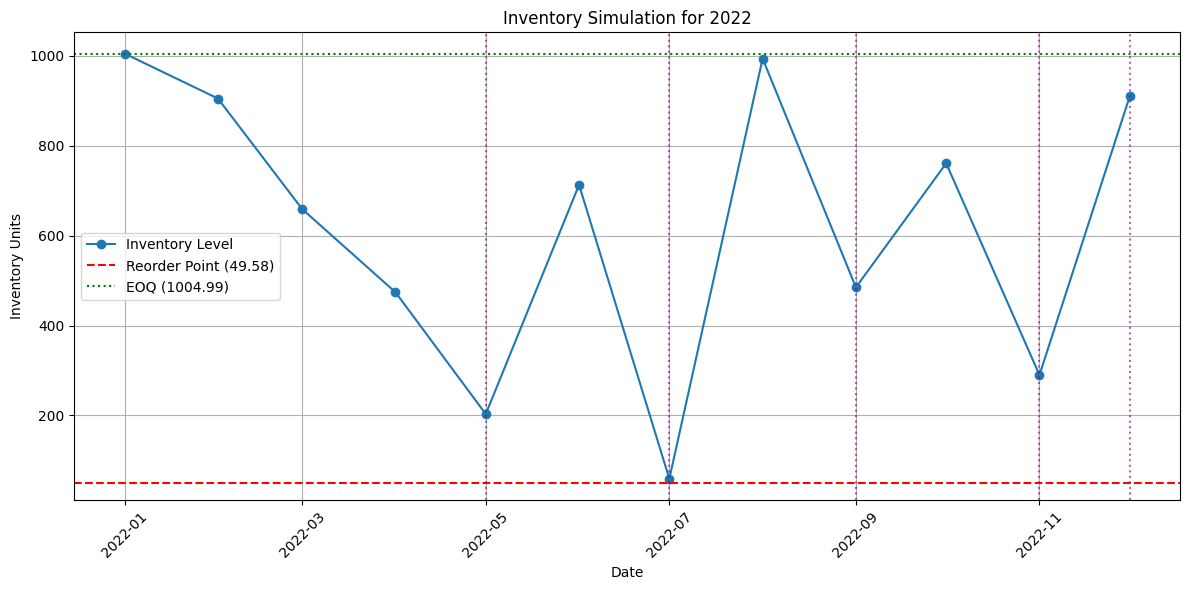

,Date,Unit Sold,Inventory Level,Order Placed
0,2022-01-01,100.0,1004.987562,0.000000
1,2022-02-01,246.0,904.987562,0.000000
2,2022-03-01,185.0,658.987562,0.000000
3,2022-04-01,271.0,473.987562,0.000000
4,2022-05-01,495.0,202.987562,1004.987562
5,2022-06-01,654.0,712.975124,0.000000
6,2022-07-01,70.0,58.975124,1004.987562
7,2022-08-01,509.0,993.962686,0.000000
8,2022-09-01,729.0,484.962686,1004.987562
9,2022-10-01,471.0,760.950248,0.000000


In [27]:
# --- Simulation Setup ---

# Monthly sales data (unit sold per month for 2022)
dates = pd.date_range(start='2022-01-01', periods=12, freq='MS')


# --- Inventory Simulation ---
inventory = [eoq]  # start with full EOQ
orders = [0]       # record of orders placed
stock_levels = []
order_dates = []

unit_sold = df_reorder['Unit Sold'].tolist()  # Monthly unit sold data

for i in range(len(unit_sold)):
    current_inventory = inventory[-1] - unit_sold[i]
    stock_levels.append(current_inventory)

    # Check if we need to reorder
    if current_inventory <= reorder_point:
        inventory.append(current_inventory + eoq)  # order arrives instantly in this simple sim
        orders.append(eoq)
        order_dates.append(dates[i])
    else:
        inventory.append(current_inventory)
        orders.append(0)

# Remove the last extra inventory state used for simulation
inventory = inventory[:-1]

# Create DataFrame
df_sim = pd.DataFrame({
    "Date": dates,
    "Unit Sold": unit_sold,
    "Inventory Level": inventory,
    "Order Placed": orders[1:]  # skip initial state
})

# --- Plotting ---
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_sim["Date"], df_sim["Inventory Level"], marker='o', label='Inventory Level')
ax.axhline(reorder_point, color='r', linestyle='--', label=f'Reorder Point ({reorder_point:.2f})')
ax.axhline(eoq, color='g', linestyle=':', label=f'EOQ ({eoq:.2f})')

# Highlight order points
for order_date in order_dates:
    ax.axvline(order_date, color='purple', linestyle=':', alpha=0.6)

ax.set_title('Inventory Simulation for 2022')
ax.set_ylabel('Inventory Units')
ax.set_xlabel('Date')
ax.legend()
ax.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df_sim.head(12)


## Reorder Point with Safety Stock Calculations


### Key Inventory Management Formulas

#### 1. Economic Order Quantity (EOQ / Optimal Order Quantity)

$$
Q = \sqrt{\frac{2 \cdot D \cdot S}{H}}
$$

Where:  
- $Q$: Optimal order quantity  
- $D$: Annual demand  
- $S$: Ordering (or setup) cost per order  
- $H$: Annual holding cost per unit  

---

#### 2. Mean Demand During Lead Time

$$
\mu_L = \mu_d \cdot L
$$

Where:  
- $\mu_L$: Mean demand during lead time  
- $\mu_d$: Mean daily demand  
- $L$: Lead time (in days)  

---

#### 3. Standard Deviation of Demand During Lead Time

$$
\sigma_L = \sigma_d \cdot \sqrt{L}
$$

Where:  
- $\sigma_L$: Standard deviation of demand during lead time  
- $\sigma_d$: Standard deviation of daily demand  
- $L$: Lead time (in days)  

---

#### 4. Safety Stock

$$
SS = Z \cdot \sigma_L = Z \cdot \sigma_d \cdot \sqrt{L}
$$

Where:  
- $SS$: Safety stock  
- $Z$: Z-score corresponding to the desired service level  
- $\sigma_L$: Standard deviation of demand during lead time  

---

#### 5. Reorder Point (ROP)

$$
ROP = \mu_L + SS = \mu_d \cdot L + Z \cdot \sigma_d \cdot \sqrt{L}
$$

Where:  
- $ROP$: Reorder point  
- $\mu_L$: Mean demand during lead time  
- $SS$: Safety stock  
- $\mu_d$: Mean daily demand  
- $\sigma_d$: Standard deviation of daily demand  
- $L$: Lead time (in days)


In [ ]:
'''
Note: since lead time varies, you can compute the average and use that as the lead time for calculating
safety stock

already defined variables:
Holding Cost: 0.5 per unit
Order Cost: $50 per order
'''

file_path3 = r"D:\2-Datasets from Various Resources\Supply Chains Domain Knowledge\Leverage DS Spec\Course2\Copy of Course 2 Module 2 Activity.xlsx"

df_reorder_ss = pd.read_excel(file_path3, header=1)  # Use the second row as header (0-indexed)
df_reorder_ss

,Date,Product ID,Unit Sold,Supply Lead-time
0,2022-01-01,123,100,4
1,2022-01-02,123,246,4
2,2022-01-03,123,185,5
3,2022-01-04,123,271,4
4,2022-01-05,123,495,5
5,2022-01-06,123,654,1
6,2022-01-07,123,70,5
7,2022-01-08,123,509,2
8,2022-01-09,123,729,4
9,2022-01-10,123,471,3


##### Calculate Mean Demand During Lead Time

In [4]:
avg_lead_time_ss = df_reorder_ss['Supply Lead-time'].mean()
average_daily_demand_ss = df_reorder_ss['Unit Sold'].mean()
mu_l = average_daily_demand_ss * avg_lead_time_ss

print(f"Average Lead Time: {avg_lead_time_ss:.2f} days\nAverage Daily Demand: {average_daily_demand_ss:.2f} units/day\nMean Demand during Lead Time (μL): {mu_l:.2f} units")

Average Lead Time: 3.84 days
Average Daily Demand: 454.48 units/day
Mean Demand during Lead Time (μL): 1744.63 units


##### Calculate Standard Deviation During Lead Time

In [5]:
std_daily_demand_ss = df_reorder_ss['Unit Sold'].std()
sigma_l = std_daily_demand_ss * np.sqrt(avg_lead_time_ss)
print(f"Standard Deviation of Daily Demand: {std_daily_demand_ss:.2f} units\nStandard Deviation of Demand during Lead Time (σL): {sigma_l:.2f} units")

Standard Deviation of Daily Demand: 293.85 units
Standard Deviation of Demand during Lead Time (σL): 575.74 units


##### Calculate Safety Stock SS

In [6]:
service_level = 0.95  # select from (0.90, 0.95, 0.97, 0.98, 0.99)
z_score = norm.ppf(service_level)  # Convert service level to Z-score
ss = z_score * sigma_l
print(f"Safety Stock (SS) for {service_level*100}% service level: {ss:.2f} units")

Safety Stock (SS) for 95.0% service level: 947.01 units


##### Calculating Reorder Point

In [7]:
rop = mu_l + ss
print(f"Reorder Point (ROP) with Safety Stock: {rop:.2f} units")

Reorder Point (ROP) with Safety Stock: 2691.64 units


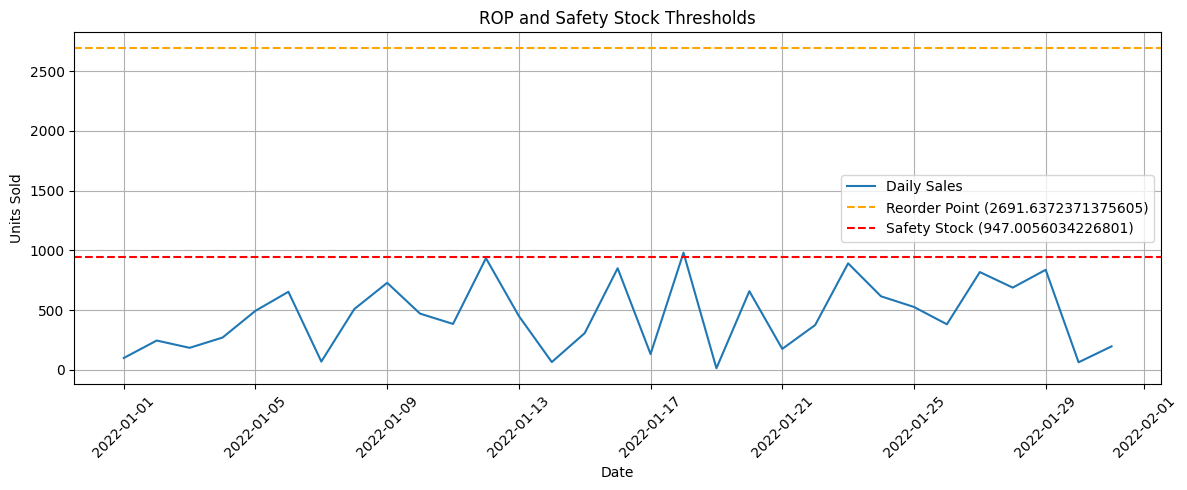

In [8]:
# Example values from previous steps

reorder_point = rop  
safety_stock = ss  

plt.figure(figsize=(12, 5))
plt.plot(df_reorder_ss['Date'], df_reorder_ss['Unit Sold'], label='Daily Sales')
plt.axhline(reorder_point, color='orange', linestyle='--', label=f'Reorder Point ({reorder_point})')
plt.axhline(safety_stock, color='red', linestyle='--', label=f'Safety Stock ({safety_stock})')
plt.title('ROP and Safety Stock Thresholds')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

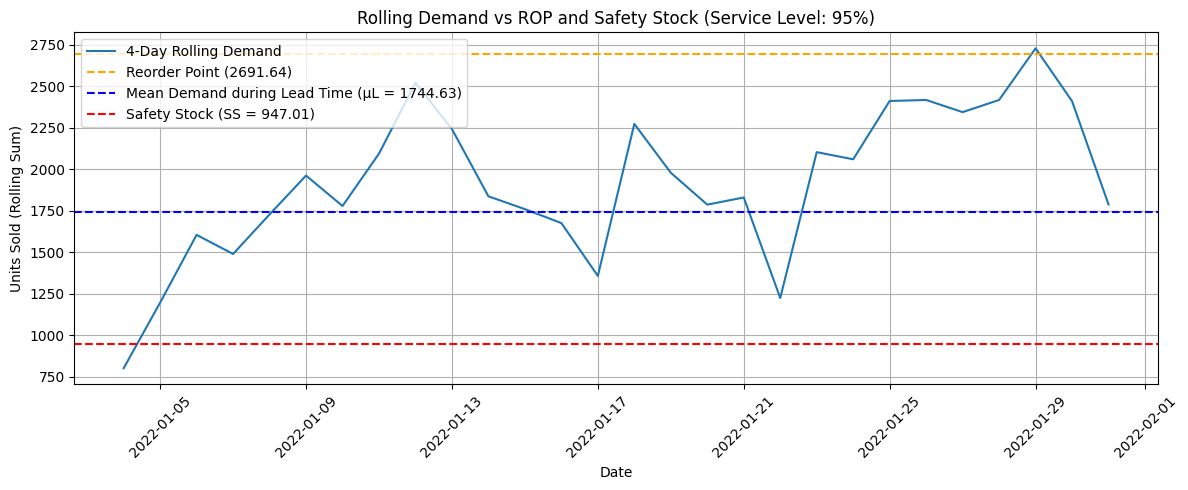

In [11]:
lead_time_rounded = round(avg_lead_time_ss)  # Typically 4 days in your case
df_reorder_ss['Rolling Demand'] = df_reorder_ss['Unit Sold'].rolling(window=lead_time_rounded).sum()

plt.figure(figsize=(12, 5))
plt.plot(df_reorder_ss['Date'], df_reorder_ss['Rolling Demand'], label=f'{lead_time_rounded}-Day Rolling Demand')
plt.axhline(rop, color='orange', linestyle='--', label=f'Reorder Point ({rop:.2f})')
plt.axhline(mu_l, color='blue', linestyle='--', label=f'Mean Demand during Lead Time (μL = {mu_l:.2f})')
plt.axhline(ss, color='red', linestyle='--', label=f'Safety Stock (SS = {ss:.2f})')
plt.title(f'Rolling Demand vs ROP and Safety Stock (Service Level: {service_level*100:.0f}%)')
plt.xlabel('Date')
plt.ylabel('Units Sold (Rolling Sum)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


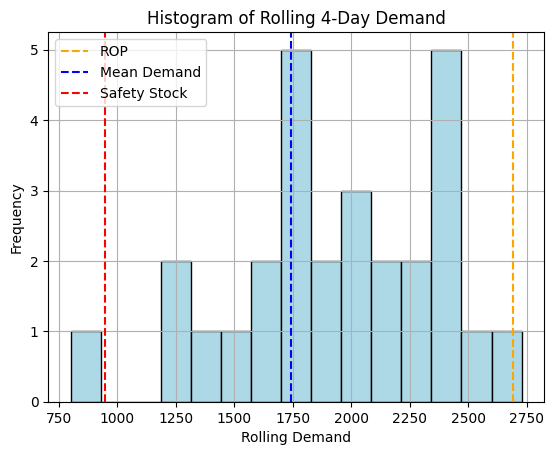

In [13]:
df_reorder_ss['Rolling Demand'].hist(bins=15, color='lightblue', edgecolor='black')
plt.axvline(rop, color='orange', linestyle='--', label='ROP')
plt.axvline(mu_l, color='blue', linestyle='--', label='Mean Demand')
plt.axvline(ss, color='red', linestyle='--', label='Safety Stock')
plt.title(f'Histogram of Rolling {lead_time_rounded}-Day Demand')
plt.xlabel('Rolling Demand')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Footnote

**I'm not understanding above results!!** 

**Why the reorder point is very high??**

**What exactly doe we mean by rolling windows?**

**How correctly we simulate a real case demand and stock?**


## What is a Rolling Window?

### Definition:
A rolling window (also called a moving window or sliding window) is a technique used to calculate statistics (like sum, mean, standard deviation, etc.) over a fixed number of consecutive data points, which "rolls" through the dataset.

### Why Use It?
In time-series or inventory data, demand fluctuates. A rolling window helps to smooth the data, track local trends, or evaluate cumulative demand over a lead time.

### Example:
If you want to compute total demand over the next 4 days for every day:

- Jan 1–Jan 4 → sum = 100 + 246 + 185 + 271  
- Jan 2–Jan 5 → sum = 246 + 185 + 271 + 495  
- and so on...

This is a rolling sum over a 4-day window.

## Key Inventory Concepts

| Term                      | Formula                | Meaning                                         |
|---------------------------|------------------------|-------------------------------------------------|
| Average Daily Demand (D)  | mean of daily sales    | Expected units sold per day                     |
| Lead Time (L)             | days                   | Time from order placement to delivery           |
| Mean Demand During Lead Time ($\mu_L$) | $D \times L$           | Units expected to be sold during lead time      |
| Safety Stock (SS)         | $Z \times \sigma_L$    | Extra stock to avoid stockouts                  |
| ROP (Reorder Point)       | $\mu_L + SS$           | When to reorder to avoid stockout               |

## Full Scenario: Reorder Point & Safety Stock with Rolling Demand

We'll simulate a real-world case:

### Business Scenario:
You’re managing stock for a single product. You want to:

- Avoid stockouts during lead time.
- Use past sales data to calculate reorder point.
- Assume demand fluctuates and lead time is variable.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Step 1: Sample Dataset
np.random.seed(42)
days = pd.date_range(start="2022-01-01", periods=60)
daily_sales = np.random.poisson(lam=400, size=60)  # Simulated daily demand
lead_time_days = np.random.randint(3, 6, size=60)  # Variable lead time

df = pd.DataFrame({
    "Date": days,
    "Unit Sold": daily_sales,
    "Supply Lead-time": lead_time_days
})

# Step 2: Calculate core stats
avg_daily_demand = df["Unit Sold"].mean()
avg_lead_time = df["Supply Lead-time"].mean()
mu_l = avg_daily_demand * avg_lead_time

# Step 3: Estimate std deviation of demand during lead time
std_daily_demand = df["Unit Sold"].std()
sigma_l = std_daily_demand * np.sqrt(avg_lead_time)

# Step 4: Choose Service Level and compute Z-score
service_level = 0.95
z_score = norm.ppf(service_level)

# Step 5: Compute Safety Stock and Reorder Point
ss = z_score * sigma_l
rop = mu_l + ss

print(f"Avg Daily Demand: {avg_daily_demand:.2f}")
print(f"Avg Lead Time: {avg_lead_time:.2f}")
print(f"Mean Demand During Lead Time (μL): {mu_l:.2f}")
print(f"Safety Stock (SS): {ss:.2f}")
print(f"Reorder Point (ROP): {rop:.2f}")


Avg Daily Demand: 401.13
Avg Lead Time: 4.10
Mean Demand During Lead Time (μL): 1644.65
Safety Stock (SS): 68.09
Reorder Point (ROP): 1712.74


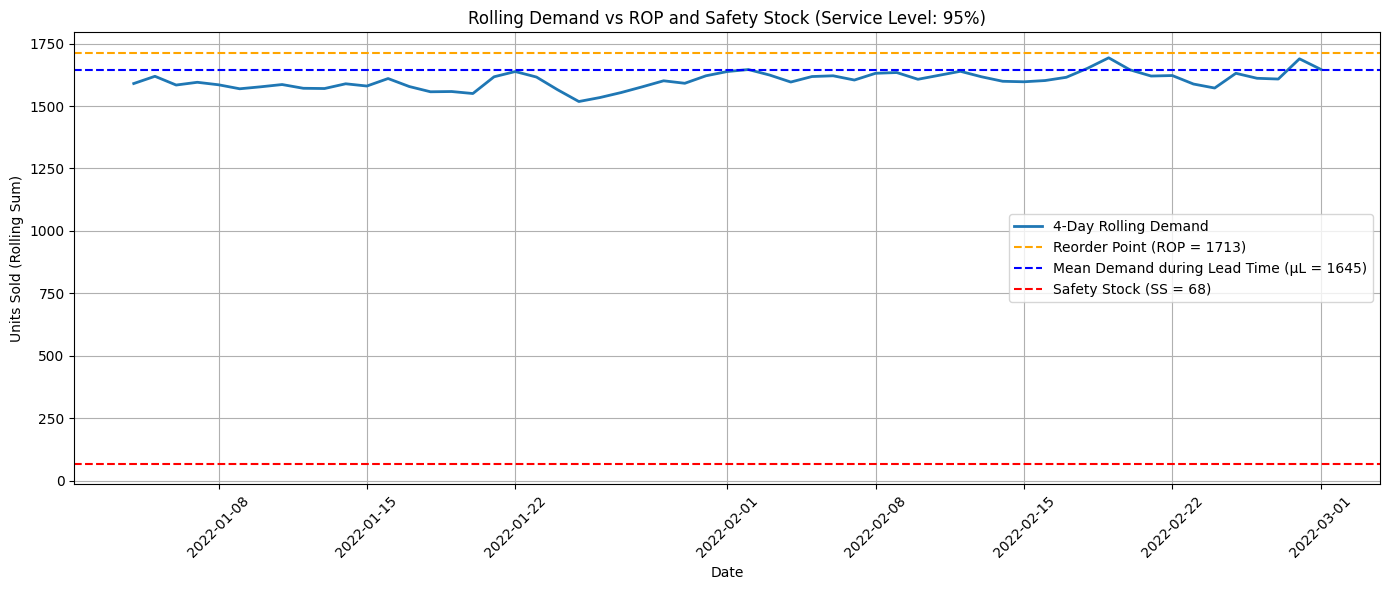

In [15]:
# Rolling window based on lead time (rounded to 4 days for simplicity)
rolling_window = 4
df["Rolling Demand"] = df["Unit Sold"].rolling(window=rolling_window).sum()

plt.figure(figsize=(14, 6))
plt.plot(df["Date"], df["Rolling Demand"], label=f'{rolling_window}-Day Rolling Demand', linewidth=2)
plt.axhline(rop, color='orange', linestyle='--', label=f'Reorder Point (ROP = {rop:.0f})')
plt.axhline(mu_l, color='blue', linestyle='--', label=f'Mean Demand during Lead Time (μL = {mu_l:.0f})')
plt.axhline(ss, color='red', linestyle='--', label=f'Safety Stock (SS = {ss:.0f})')

plt.title(f'Rolling Demand vs ROP and Safety Stock (Service Level: {int(service_level*100)}%)')
plt.xlabel("Date")
plt.ylabel("Units Sold (Rolling Sum)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Interpretation of Plot

- **Blue Line ($\mu_L$)**: Expected demand during lead time. This is the core baseline.
- **Red Line (SS)**: Extra buffer to protect against variability.
- **Orange Line (ROP)**: When cumulative demand reaches this level, you must reorder.
- **Rolling Demand**: Tracks actual recent 4-day demand.

If rolling demand crosses the ROP, it's a signal to reorder.

## Summary

| Concept          | Real World Meaning                                      |
|------------------|---------------------------------------------------------|
| Rolling Window   | Recent demand trend over lead time                      |
| Safety Stock     | Protection against demand/lead time uncertainty         |
| ROP              | "When to reorder" rule                                  |
| Z-Score          | Tied to risk tolerance (e.g., 95% means 5% risk of stockout) |
